# EDA
* 각 데이터 시트별로 살펴보겠습니다.

## 모듈 로드

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [10]:
import warnings
warnings.filterwarnings('ignore')

## 데이터 로드

In [2]:
path = './data/'

In [3]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
history = pd.read_csv(path + 'historical_transactions.csv')
new_history = pd.read_csv(path + 'new_merchant_transactions.csv')
merchant = pd.read_csv(path + 'merchants.csv')

### train data

#### target

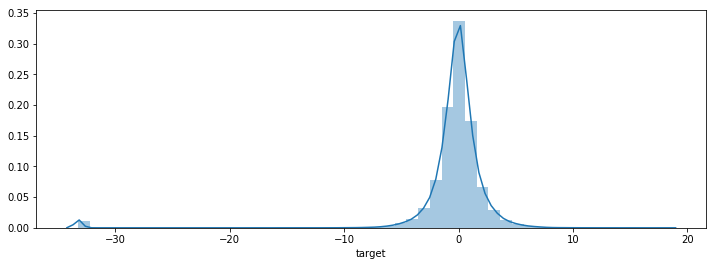

In [116]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train.target)

In [15]:
train.target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

In [30]:
pd.crosstab(train[train.target < -15].target, 'cnt')

col_0,cnt
target,
-33.219281,2207
-17.608147,1
-17.492640,1
-17.441923,1
-17.189636,1
-15.835656,1
-15.553269,1
-15.400146,1
-15.291387,1


In [52]:
train_new = train[train.target > -20]

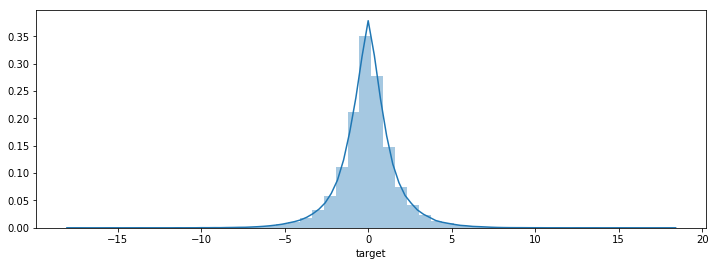

In [115]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train_new.target)

In [54]:
train_new.target.describe()

count    199710.000000
mean         -0.030879
std           1.717793
min         -17.608147
25%          -0.844513
50%          -0.007783
75%           0.777331
max          17.965068
Name: target, dtype: float64

#### first_active_month

In [55]:
train_new.rename({'first_active_month':'first_active'}, axis=1, inplace=True)

In [59]:
train_new['first_active_year'] = train_new.first_active.apply(lambda v: v.split('-')[0])
train_new['first_active_month'] = train_new.first_active.apply(lambda v: v.split('-')[1])

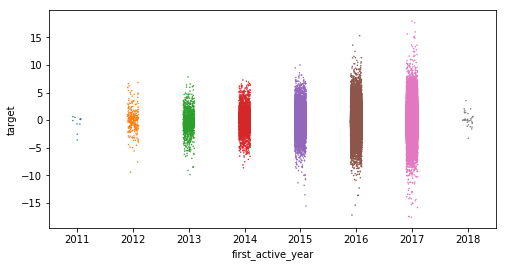

In [135]:
f, ax = plt.subplots(figsize=(8, 4))
sns.stripplot(train_new.first_active_year, train_new.target, size=1.5)

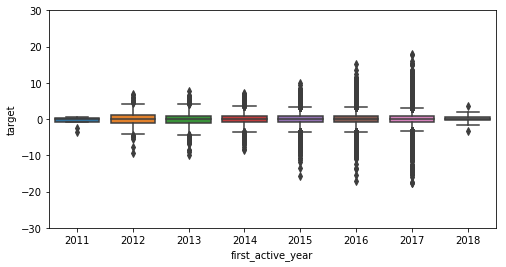

In [110]:
var = 'first_active_year'
data = pd.concat([train_new['target'], train_new[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=-30, ymax=30);

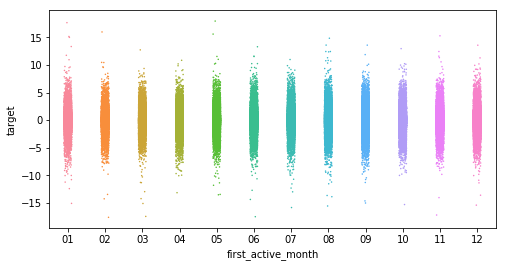

In [108]:
f, ax = plt.subplots(figsize=(8, 4))
sns.stripplot(train_new.first_active_month, train_new.target, size=1.5)

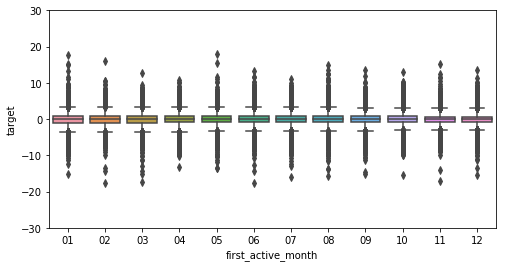

In [109]:
var = 'first_active_month'
data = pd.concat([train_new['target'], train_new[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 4))
fig = sns.boxplot(x=var, y="target", data=data)
fig.axis(ymin=-30, ymax=30);

* value count

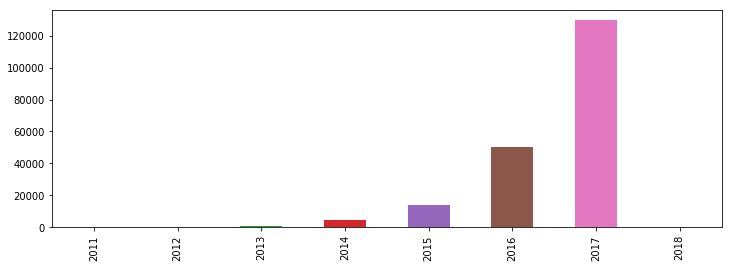

In [133]:
train_new.first_active_year.value_counts().sort_index().plot('bar', figsize=(12,4))

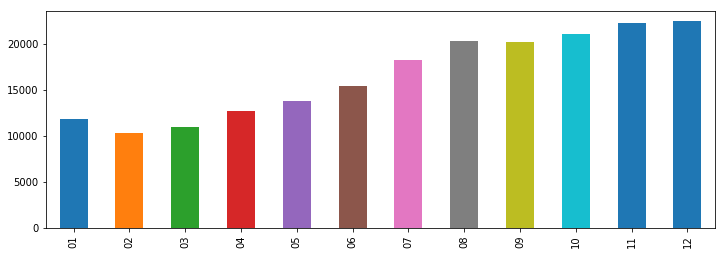

In [134]:
train_new.first_active_month.value_counts().sort_index().plot('bar', figsize=(12,4))

#### feature_1

In [88]:
train_new.feature_1.unique()

array([5, 4, 2, 1, 3], dtype=int64)

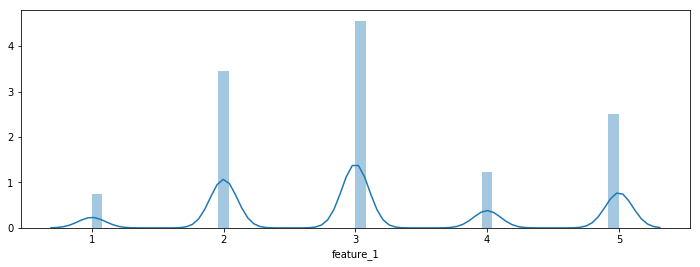

In [103]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train_new.feature_1)

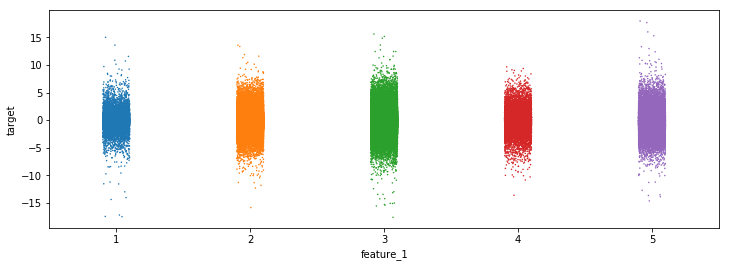

In [102]:
f, ax = plt.subplots(figsize=(12, 4))
sns.stripplot(train_new.feature_1, train_new.target, size=1.5)

#### feature_2

In [89]:
train_new.feature_2.unique()

array([2, 1, 3], dtype=int64)

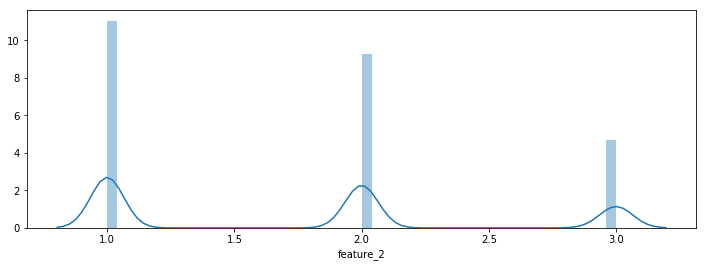

In [112]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train_new.feature_2)

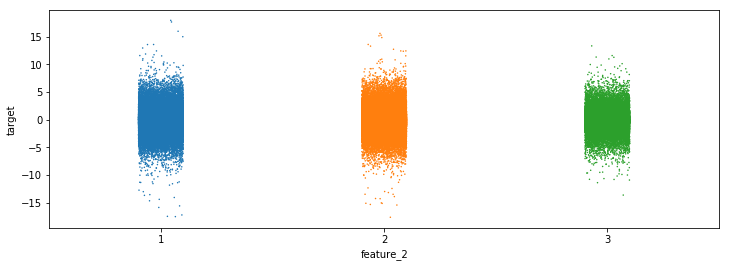

In [111]:
f, ax = plt.subplots(figsize=(12, 4))
sns.stripplot(train_new.feature_2, train_new.target, size=1.5)

#### feature_3

In [92]:
train_new.feature_3.unique()

array([1, 0], dtype=int64)

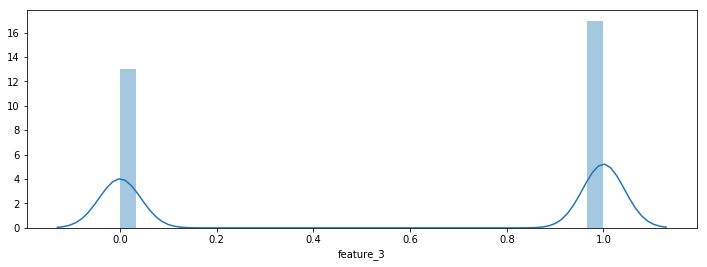

In [113]:
f, ax = plt.subplots(figsize=(12, 4))
sns.distplot(train_new.feature_3)

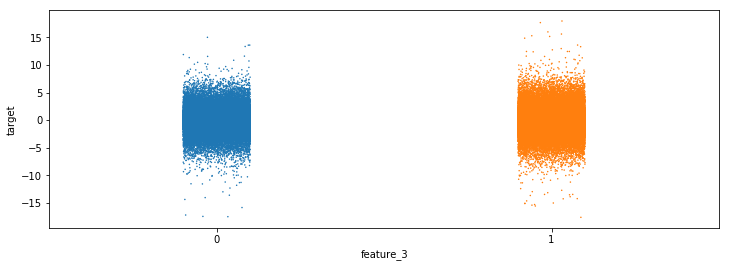

In [114]:
f, ax = plt.subplots(figsize=(12, 4))
sns.stripplot(train_new.feature_3, train_new.target, size=1.5)

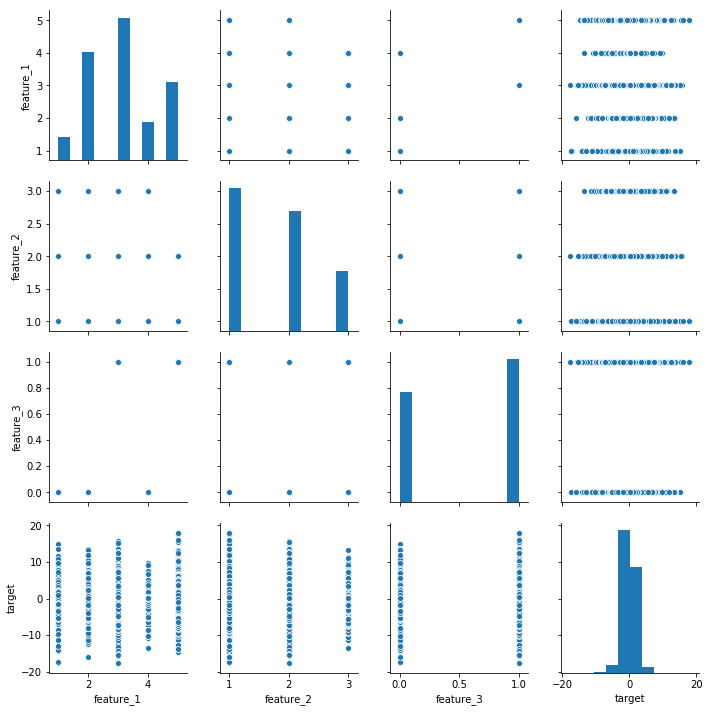

In [101]:
sns.pairplot(train_new.drop(['first_active', 'card_id', 'first_active_month', 'first_active_year'], axis = 1))

### a